In [94]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing

In [95]:
test_data = pd.read_csv('../data/titanic/test.csv')
train_data = pd.read_csv('../data/titanic/train.csv')
gender_sub = pd.read_csv('../data/titanic/gender_submission.csv')

In [96]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [97]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [105]:
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [99]:
drop_column = ['Cabin']
train_data.drop(drop_column, axis=1, inplace = True)
test_data.drop(drop_column, axis=1, inplace=True)

In [103]:
# Fill missing values with mean column values in the train set
train_data['Age'].fillna(train_data['Age'].median(), inplace = True)
test_data['Age'].fillna(test_data['Age'].median(), inplace = True)

In [104]:
train_data['Embarked'].fillna('S', inplace = True)

In [101]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(4)
memory usage: 76.7+ KB


In [108]:
y_train = train_data['Survived']
y_test = gender_sub['Survived']

features = ["Pclass", "Sex", "SibSp", "Parch"]
X_train = pd.get_dummies(train_data[features]).values
X_test = pd.get_dummies(test_data[features]).values

In [109]:
X_train

array([[3, 1, 0, 0, 1],
       [1, 1, 0, 1, 0],
       [3, 0, 0, 1, 0],
       ...,
       [3, 1, 2, 1, 0],
       [1, 0, 0, 0, 1],
       [3, 0, 0, 0, 1]])

In [110]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=1)
model.fit(X_train, y_train)
predictions = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': predictions})
output.to_csv('submission_randomForest.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [111]:
model = KNeighborsClassifier(n_neighbors = 8)
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_predict})
output.to_csv('submissionKNN.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [112]:
from sklearn import metrics
Ks = 20
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))

for n in range(1,Ks):
    
    #Train Model and Predict  
    neigh = KNeighborsClassifier(n_neighbors = n).fit(X_train,y_train)
    yhat=neigh.predict(X_test)
    mean_acc[n-1] = metrics.accuracy_score(y_test, yhat)

    
    std_acc[n-1]=np.std(yhat==y_test)/np.sqrt(yhat.shape[0])

mean_acc

array([0.56937799, 0.79186603, 0.82535885, 0.93779904, 0.93779904,
       0.94976077, 0.95454545, 0.96172249, 0.95215311, 0.9354067 ,
       0.94497608, 0.94258373, 0.93301435, 0.94497608, 0.93779904,
       0.95454545, 0.93062201, 0.91866029, 0.9569378 ])

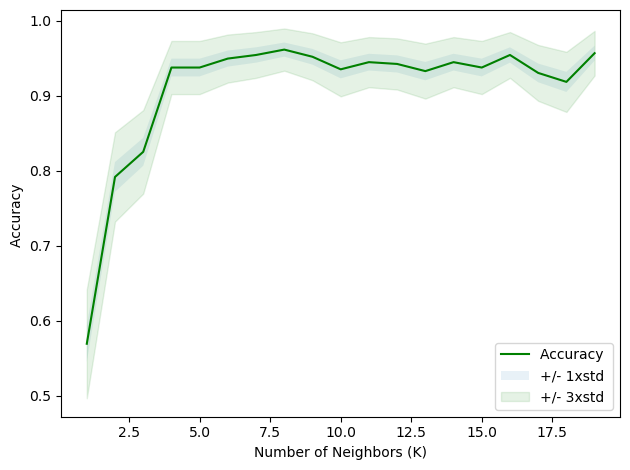

In [113]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.10)
plt.fill_between(range(1,Ks),mean_acc - 3 * std_acc,mean_acc + 3 * std_acc, alpha=0.10,color="green")
plt.legend(('Accuracy ', '+/- 1xstd','+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (K)')
plt.tight_layout()
plt.show()

In [114]:
print( "The best accuracy was with", mean_acc.max(), "with k=", mean_acc.argmax()+1) 

The best accuracy was with 0.9617224880382775 with k= 8


In [115]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X_train, y_train)
y_predict = model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': y_predict})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")


Your submission was successfully saved!


In [116]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
f1 = f1_score(y_test, y_predict, average='macro')

# get accuracy
acc = accuracy_score(y_test, y_predict)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.9896019900497512
Accuracy:  0.9904306220095693


## Neural Network

In [117]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs', alpha=1e-5, hidden_layer_sizes=(5, 2), random_state=1)

clf.fit(X_train, y_train)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1, solver='lbfgs')

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [118]:
clf_y_pred = clf.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': clf_y_pred})
output.to_csv('submission_neural.csv', index=False)
print("Your submission was successfully saved!")

Your submission was successfully saved!


In [119]:
f1 = f1_score(y_test, clf_y_pred, average='macro')

# get accuracy
acc = accuracy_score(y_test, clf_y_pred)

print("F1 Score: ", f1)
print("Accuracy: ", acc)

F1 Score:  0.9737681050279892
Accuracy:  0.9760765550239234


In [123]:
from sklearn.ensemble import GradientBoostingClassifier
model= GradientBoostingClassifier()
model.fit(X_train,y_train)
prediction_gbc=model.predict(X_test)

output = pd.DataFrame({'PassengerId': test_data.PassengerId, 'Survived': prediction_gbc})
output.to_csv('submissionGBC.csv', index=False)
print("Your submission was successfully saved!")

print('The accuracy of the Gradient Boosting Classifier is',round(accuracy_score(prediction_gbc ,y_test)*100,2))

Your submission was successfully saved!
The accuracy of the Gradient Boosting Classifier is 97.13


In [127]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [128]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [142]:
# set X and y
X = train_data.drop(['Survived'], axis=1)

y = train_data['Survived']

# get rid of not useful features
X = X.drop(['PassengerId', 'Name', 'Ticket'], axis=1)

# fill missing values
X['Age'].fillna(X['Age'].median(), inplace=True)
X['Embarked'].fillna(X['Embarked'].mode()[0], inplace=True)

# convert categorical variables to dummies
X = pd.get_dummies(X, drop_first=True)

# scale the variables
scaler = preprocessing.StandardScaler()
X_scaled = scaler.fit_transform(X)

# add model
model = tree.DecisionTreeClassifier(max_depth=5)
model.fit(X_scaled, y)

# predict and get accuracy
y_predictTree = model.predict(X_scaled)
acc = accuracy_score(y, y_predictTree)

print("Accuracy: ", acc)
print("Your submission was successfully saved!")

Accuracy:  0.8406285072951739
Your submission was successfully saved!


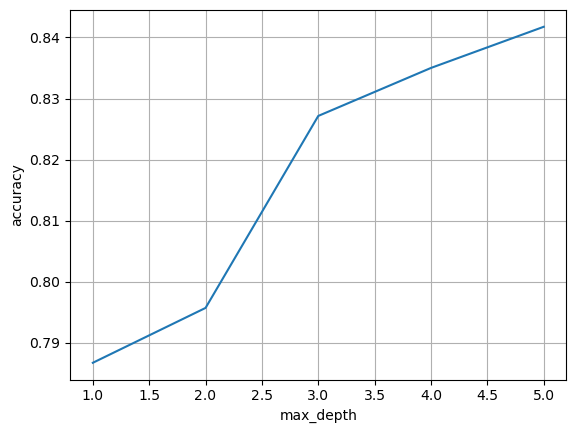

Best accuracy:  0.8417508417508418
Best max_depth:  5


In [143]:
# find the best max_depth
max_depth_range = list(range(1, 6))

accuracy = []

for depth in max_depth_range:
        
        model = tree.DecisionTreeClassifier(max_depth = depth)
        model.fit(X_scaled, y)
        y_predict = model.predict(X_scaled)
        accuracy.append(accuracy_score(y, y_predict))

plt.plot(max_depth_range, accuracy)
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.grid(True)
plt.show()

# print the best accuracy and the best max_depth
print("Best accuracy: ", max(accuracy))
print("Best max_depth: ", accuracy.index(max(accuracy))+1)